# Estadística Aplicada
## Raúl Flores Robles 1838148
### Sesión 11 - 10 de marzo 2023

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [5]:
relacion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [7]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


Es una base de datos con 42 observaciones cuya finalidad era medir que si alguien es detallista en la relación, esta dura más.
Se siguieron a las parejas de forma semanal, se asignó de forma aleatoria a la mitad a ser detallista y a la otra mitad no detallista. A los detallistas se les pidió hacer por lo menos un regalo semanal a su pareja. A los no detallistas se les pidió que no hicieran ningun regalo.

###  Variables

**t** : tiempo en semanas

**tratamiento**: 1 si es detallista, 0 si no.

**estado**: 1 si terminó la relación. 0 si no.

**Objetivo**

Medir si ser detallista con tu pareja afecta la duración de la relación.

**Hipótesis**

Si eres detallista la relación dura mas porque muestra que te importa la relación.

In [8]:
relacion.describe()

,tratamiento,t,estado
count,42.000000,42.000000,42.000000
mean,0.500000,12.880952,0.714286
std,0.506061,9.347498,0.457230
min,0.000000,1.000000,0.000000
25%,0.000000,6.000000,0.000000
50%,0.500000,10.500000,1.000000
75%,1.000000,18.500000,1.000000
max,1.000000,35.000000,1.000000


In [10]:
relacion.groupby('tratamiento').agg(['mean','std'])

t              estado          
                  mean       std      mean       std
tratamiento                                         
0             8.666667  6.467869  1.000000  0.000000
1            17.095238  9.999524  0.428571  0.507093

In [12]:
detallistas = relacion.query('tratamiento==1')
no_detall = relacion.query('tratamiento==0')

In [14]:
km_d = KaplanMeierFitter().fit(detallistas['t'],detallistas['estado'])
km_nd = KaplanMeierFitter().fit(no_detall['t'],no_detall['estado'])

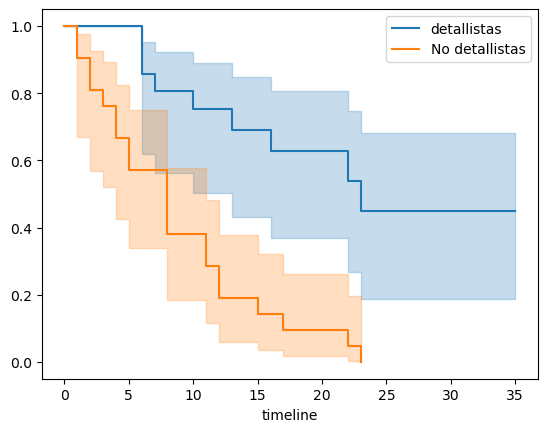

In [16]:
km_d.plot_survival_function(label='detallistas')
km_nd.plot_survival_function(label='No detallistas');

In [17]:
lrt = logrank_test(detallistas['t'],detallistas['estado'],no_detall['t'],no_detall['estado'])

In [20]:
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          42.45 <0.005     33.68

Con un $\alpha=0.05$ se rechaza H0, por tanto las funciones de supervivencia de detallistas y no detallistas si son distintas

In [23]:
cph = CoxPHFitter().fit(relacion,'t','estado')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'estado'
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -85.01
         time fit was run = 2023-03-10 22:23:24 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
tratamiento  -1.57       0.21       0.41            -2.38            -0.76                 0.09                 0.47

              cmp to     z      p   -log2(p)
covariate                                   
tratamiento     0.00 -3.81 <0.005      12.83
---
Concordance = 0.69
Partial AIC = 172.02
log-likelihood ratio test = 16.35 on 1 df
-log2(p) of ll-ratio test = 14.21

Ser detallista disminuye el riesgo de que termine la relación.

Alguien que es detallista tiene una 79% menos riesgo de que termine la relación en comparación de alguien que no lo es.